In [342]:
using Plots


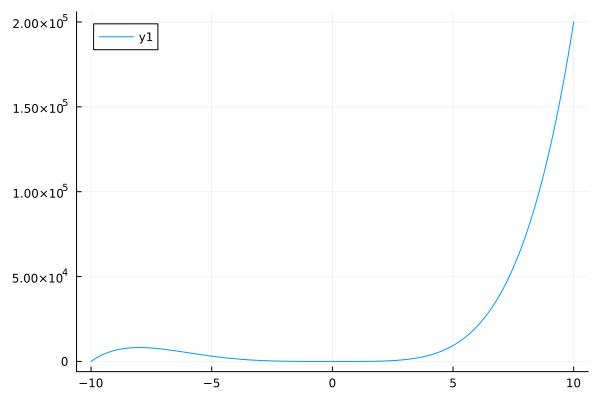

In [343]:
f(x) = x^5+10*x^4
xs = -10:.1:10
Plots.plot(xs, f.(xs))

In [344]:
function is_unimodal(f, a, b, eps, h)
    ddf(x) = (f(x+h)-2*f(x)+f(x-h))/h^2
    atr = a:eps:b
    for i ∈ atr
        if ddf(i) < 0
            return false
        end
    end 
    return true
end
function is_unimodal_v2(f, a, b, eps, h)
    df(x) = (f(x+h)-f(x-h))/(h*2)
    atr = a:eps:b
    pred = df(a)
    for i ∈ atr
        if pred > df(i)
            return false
        end
        pred = df(i)
    end 
    return true
end
a = -1
b = 10
println("Унимодальна на [", a, "; ", b, "] (вторая производная): ", is_unimodal(f, a, b, 0.1, 1e-5))
println("Унимодальна на [", a, "; ", b, "] (первая производная): ", is_unimodal_v2(f, a, b, 0.1, 1e-5))

Унимодальна на [-1; 10] (вторая производная): true
Унимодальна на [-1; 10] (первая производная): true


In [345]:
function find_unimodal(f, a, b, eps=0.001, h=1e-5)
    ddf(x) = (f(x+h)-2*f(x)+f(x-h))/h^2
    df(x) = (f(x+h)-f(x-h))/(h*2)
    as = a 
    unimod = false
    prevx = as
    prevy = df(as)
    inters = []
    for x ∈ a:.1:b
        if ddf(x) >= 0 && prevy <= df(x)
            if !unimod 
                unimod = true
                as = x
            end
        elseif unimod
            unimod = false
            push!(inters, [as, prevx])
        end
        prevx = x
        prevy = df(x)
    end
    if unimod 
        push!(inters, [as, prevx])
    end
    return inters
end
find_unimodal(f, -100, 100)

1-element Vector{Any}:
 [-5.9, 100.0]

brut_force число итераций: 84
brut_force минимум функции: 0.008210114300000003


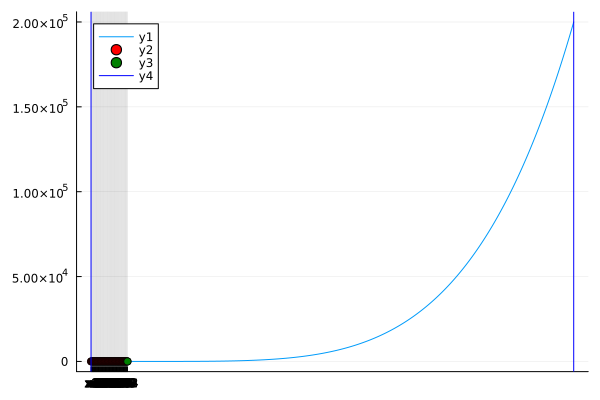

In [346]:
function brut_force(f, a, b, eps=0.01)
    dots = a:eps:b
    x_fin = a
    f_fin = f(a)
    counter = 0
    points_x = []
    points_y = []
    for x ∈ dots
        counter += 1
        if f(x) <= f_fin
            x_fin = x
            f_fin = f(x)
            push!(points_x, x)
            push!(points_y, f(x))
        else
            return x, f(x), counter, [points_x, points_y]
        end
        if abs(f(x) - f(0)) < eps
            return x, f(x), counter, [points_x, points_y]
        end
    end
    return x_fin, f_fin, counter, [points_x, points_y]
end

x_fin, y_fin, ct, ps = brut_force(f, a, b)
println("brut_force число итераций: ", ct)
println("brut_force минимум функции: ",y_fin)
Plots.plot(a:0.01:b, f.(a:0.01:b))
scatter!(ps[1], ps[2], color=:red, xticks=(ps[1], string.("x", 1:483)))
scatter!([x_fin], [y_fin], color=:green)
vline!([a, b], color=:blue)



del2 число итераций: 5
del2 минимум функции: 9.566545486450195e-6


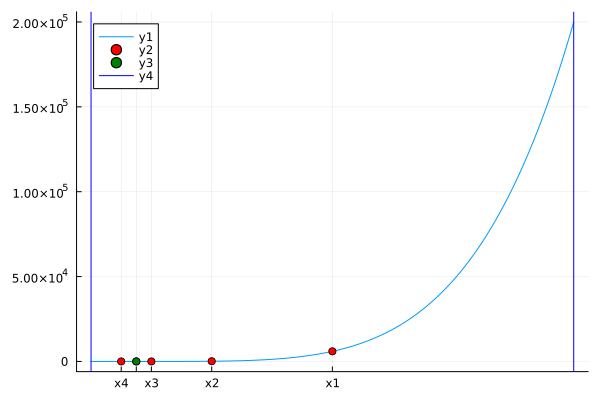

In [347]:
function del2(f, a, b, eps=0.01)
    counter = 0
    points_x = []
    points_y = []
    while b-a>eps
        counter += 1
        push!(points_x, (a+b)/2)
        push!(points_y, f((a+b)/2))
        m = (a+b)/2
        if f(m+eps)>f(m-eps)
            b = m
        else
            a = m
        end
        if abs(f(m) - f(0)) < eps
            return m, f(m), counter, [points_x, points_y]
        end
    end
    m = (a+b)/2
    return m, f(m), counter, [points_x, points_y]
end

x_fin, y_fin, ct, ps = del2(f, a, b)
println("del2 число итераций: ", ct)
println("del2 минимум функции: ",y_fin)
Plots.plot(a:0.01:b, f.(a:0.01:b))

scatter!(ps[1], ps[2], color=:red, xticks=(ps[1], string.("x", 1:4)))
scatter!([x_fin], [y_fin], color=:green)
vline!([a, b], color=:blue)

Golden_section минимум функции: 0.0014240129926073619
Golden_section число итераций: 5


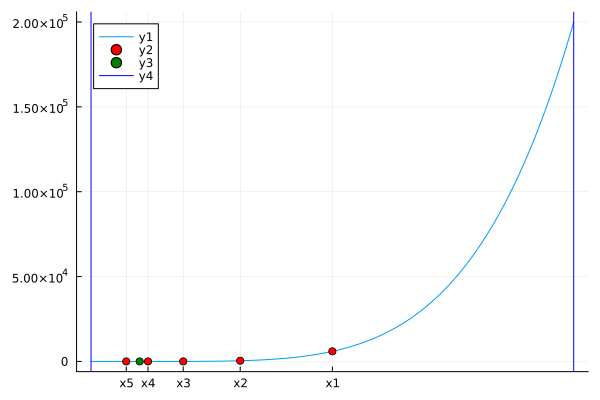

In [348]:
function golden_section(f, a, b,eps=0.01)
    Fi = (1+5^0.5)/2
    counter = 0
    points_x = []
    points_y = []
    while true
        counter += 1
        push!(points_x, (a+b)/2)
        push!(points_y, f((a+b)/2))
        x1 = b-(b-a)/Fi 
        x2 = a+(b-a)/Fi 
        y1 = f(x1)
        y2 = f(x2)
        if y1 >= y2
            a = x1
        else
            b = x2
        end
        if abs(b-a) < eps
            return (a+b)/2, f((a+b)/2), counter, [points_x, points_y]
        end
        if abs(f((a+b)/2) - f(0)) < eps
            return (a+b)/2, f((a+b)/2), counter, [points_x, points_y]
        end
    end
end
x_fin, y_fin, ct, ps = golden_section(f, a, b)
println("Golden_section минимум функции: ",y_fin)
println("Golden_section число итераций: ", ct)
Plots.plot(a:0.01:b, f.(a:0.01:b))

scatter!(ps[1], ps[2], color=:red, xticks=(ps[1], string.("x", 1:ct)))
scatter!([x_fin], [y_fin], color=:green)
vline!([a, b], color=:blue)

fibonachi минимум функции: 0.001424012992607461
fibonachi число итераций: 5


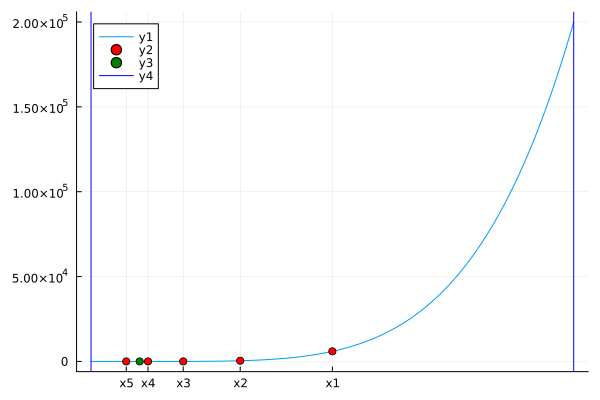

In [349]:
function calc_Fi(n)
    Fis = [1, 1]
    i = 2
    while i <= n
        push!(Fis, Fis[i]+Fis[i-1])
        i+=1
    end
    return Fis
end

function fibonachi(f, a, b, n=50, eps=0.01)
    Fis = calc_Fi(n)
    x1 = a+(b-a)*Fis[n-2]/Fis[n]
    x2 = a+(b-a)*Fis[n-1]/Fis[n]
    points_x = []
    points_y = []
    counter  = 0
    @label start
    counter += 1
    push!(points_x, (x1+x2)/2)
    push!(points_y, f((x1+x2)/2))
    y1 = f(x1)
    y2 = f(x2)
    if y1 > y2
        a = x1
        x1 = x2
        x2 = b-(x1-a)
        y1 = y2
        y2 = f(x2)
    else
        b = x2
        x2 = x1
        x1 = a+(b-x2)
        y2 = y1
        y1 = f(x1)
    end
    if abs(f((x1+x2)/2) - f(0)) < eps
        return (x1+x2)/2, f((x1+x2)/2), counter, [points_x, points_y]
    end
    if n == 1
        return (x1+x2)/2, f((x1+x2)/2), counter, [points_x, points_y]
    else
        n-=1
        @goto start
    end
end

x_fin, y_fin, ct, ps = fibonachi(f, a, b)
println("fibonachi минимум функции: ",y_fin)
println("fibonachi число итераций: ", ct)
Plots.plot(a:0.01:b, f.(a:0.01:b))

scatter!(ps[1], ps[2], color=:red, xticks=(ps[1], string.("x", 1:ct)))
scatter!([x_fin], [y_fin], color=:green)
vline!([a, b], color=:blue)